<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/One_Class_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import glob
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = '/content/drive/MyDrive/LoRaWANdataset/mapped'
df_append = pd.DataFrame()

file_list = glob.glob(DATASET_PATH + "/*.csv")
#append all files together
for file in file_list:
  df_temp = pd.read_csv(file)
  df_append = df_append.append(df_temp, ignore_index=True)

df_append = df_append.sort_values('converted')

df_append.to_csv('/content/drive/MyDrive/LoRaWANdataset/mapped/mapped.csv')

<ipython-input-90-fce47d52676a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
<ipython-input-90-fce47d52676a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
<ipython-input-90-fce47d52676a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
<ipython-input-90-fce47d52676a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
<ipython-input-90-fce47d52676a>:8: FutureWarning: The frame.append method is deprecated and 

In [ ]:
df_mapped = pd.read_csv('/content/drive/MyDrive/LoRaWANdataset/mapped/mapped.csv')
df_mapped

,Unnamed: 0.7,Unnamed: 0.1,Timestamp_x,SensorID,SequenceNumber,TotalLength,SourceAddress,TempHumiRange,TempHumiStatus,TempHumiEvent,...,machine17,machine18,machine19,machine20,machine21,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2
0,349486,0,1668729853,sensor2,135,88,NaN,0,0,0,...,0.0,1.0,0.0,0.0,0.0,187749.0,26012.0,NaN,NaN,NaN
1,26013,1,1668729866,sensor4,255,88,NaN,0,0,0,...,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,26012,0,1668729853,sensor2,135,88,NaN,0,0,0,...,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,487004,0,1668729853,sensor2,135,88,NaN,0,0,0,...,0.0,1.0,0.0,0.0,0.0,325267.0,163530.0,26012.0,NaN,NaN
4,487005,1,1668729866,sensor4,255,88,NaN,0,0,0,...,0.0,1.0,0.0,0.0,0.0,325268.0,163531.0,26013.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873541,323472,8073,1682294379896,sensor1,76,88,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,161735.0,NaN,NaN,NaN,NaN
873542,161736,8074,1682294379896,sensor1,76,88,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
873543,161734,8072,1682294379896,sensor1,76,88,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873544,323471,8072,1682294379896,sensor1,76,88,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,161734.0,NaN,NaN,NaN,NaN


In [ ]:
indexes = df_mapped[df_mapped['machine2'] !=1].index
df_mapped.drop(indexes,inplace=True)

In [ ]:
df1 = df_mapped.drop(['Unnamed: 0.4', 'Unnamed: 0.1', 'Timestamp_x', 'SensorID','SequenceNumber', 'TotalLength', 'SourceAddress', 'TempHumiRange','TempHumiStatus', 'TempHumiEvent', 'TempHumiSenVal', 'XSenEvent', 'XPeakmg', 'XRMSmg', 'XKurtosis', 'XCrestFactor','XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement', 'YSenEvent', 'YPeakmg', 'YRMSmg', 'YKurtosis', 'YCrestFactor','YSkewness', 'YDeviation', 'YPeaktoPeakDisplacement', 'ZSenEvent', 'ZPeakmg', 'ZRMSmg', 'ZKurtosis', 'ZCrestFactor','ZSkewness', 'ZDeviation', 'ZPeaktoPeakDisplacement', 'LogIndex','DeviceEvents', 'DevicePowerSrc', 'DeviceBatteryVolt', 'DeviceTime', 'Unnamed: 0', 'Timestamp_y', 'UID', 'Unnamed: 0.3', 'Unnamed: 0.2'],axis='columns')
df1.loc[:,'XOAVelocity'] /= 100
df1.loc[:,'YOAVelocity'] /= 100
df1.loc[:,'ZOAVelocity'] /= 100
df1.head(5)
df1.iloc[:, 4:26]

,converted,machine1,machine2,machine3,machine4,machine5,machine6,machine7,machine8,machine9,...,machine12,machine13,machine14,machine15,machine16,machine17,machine18,machine19,machine20,machine21
47983,2022-11-21 09:43,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47984,2022-11-21 09:43,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47985,2022-11-21 09:43,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47986,2022-11-21 09:43,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47990,2022-11-21 09:43,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862292,2023-04-19 02:51,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862297,2023-04-19 02:56,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862301,2023-04-19 02:56,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862302,2023-04-19 03:00,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

df1['x_faulty'] = ['Good' if row < 1.12 else 'Satisfactory' if row < 2.80 else 'Unsatisfactory' if row < 7.10 else 'Unacceptable' for row in df1['XOAVelocity']]
df1['y_faulty'] = ['Good' if row < 1.12 else 'Satisfactory' if row < 2.80 else 'Unsatisfactory' if row < 7.10 else 'Unacceptable' for row in df1['YOAVelocity']]
df1['z_faulty'] = ['Good' if row < 1.12 else 'Satisfactory' if row < 2.80 else 'Unsatisfactory' if row < 7.10 else 'Unacceptable' for row in df1['ZOAVelocity']]

df1['faulty'] = df1.apply(lambda row: 'Faulty' if (row['x_faulty'] == 'Unsatisfactory' or row['y_faulty'] == 'Unsatisfactory' or row['z_faulty'] == 'Unsatisfactory') else 'Good', axis=1)


# select the columns from machine1 to machine 21, excluding machine2
selected_cols = df1.iloc[:, 3:25].drop(columns=['machine2'])

# check if any of the values in the selected columns is equal to 1
any_ones = selected_cols.eq(1).any(axis=1)

# set the target column to 1 if machine 2 working alone or otherwise 0
df1['target'] = any_ones.apply(lambda x: 0 if x else 1)



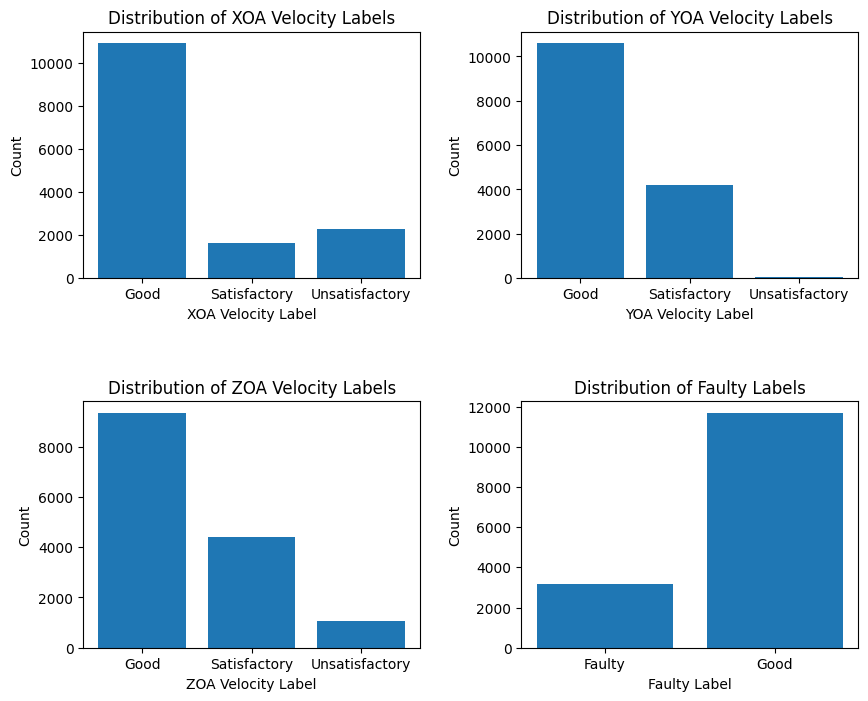

In [ ]:
# create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# plot for XOAVelocity vs x_faulty
data_x = df1.groupby('x_faulty')['XOAVelocity'].count()
axes[0, 0].bar(data_x.index, data_x.values)
axes[0, 0].set_xlabel('XOA Velocity Label')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of XOA Velocity Labels')

# plot for YOAVelocity vs y_faulty
data_y = df1.groupby('y_faulty')['YOAVelocity'].count()
axes[0, 1].bar(data_y.index, data_y.values)
axes[0, 1].set_xlabel('YOA Velocity Label')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of YOA Velocity Labels')

# plot for ZOAVelocity vs z_faulty
data_z = df1.groupby('z_faulty')['ZOAVelocity'].count()
axes[1, 0].bar(data_z.index, data_z.values)
axes[1, 0].set_xlabel('ZOA Velocity Label')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of ZOA Velocity Labels')

# plot for faulty column
data_f = df1.groupby('faulty')['faulty'].count()
axes[1, 1].bar(data_f.index, data_f.values)
axes[1, 1].set_xlabel('Faulty Label')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Distribution of Faulty Labels')

# adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# display the plot
plt.show()


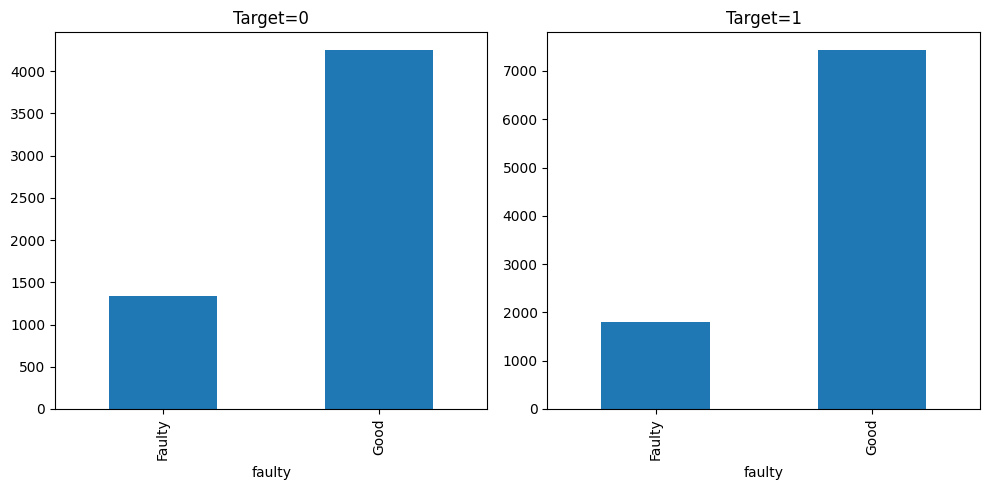

In [ ]:
# count the number of 'Faulty' and 'Good' labels for each value of 'target_column'
target_counts = df1.groupby(['target', 'faulty']).size().unstack()

# plot two bar charts, one for target_column = 0 and one for target_column = 1
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
target_counts.loc[0].plot(kind='bar', ax=axs[0], title='Target=0')
target_counts.loc[1].plot(kind='bar', ax=axs[1], title='Target=1')
plt.tight_layout()
plt.show()


In [ ]:

from sklearn.svm import OneClassSVM


def splitTrainTest(ratio, data, labels):
  
  x_train, x_test,_ = np.split(data, [round(len(data) * ratio), len(data)])
  labels_train, labels_test,_ = np.split(labels, [round(len(labels) * ratio), len(labels)])

  return (x_train,labels_train, x_test,labels_test)

# Split the dataset into training and testing sets
X_train, y_train, X_test, y_test = splitTrainTest(0.7,df1[['XOAVelocity', 'YOAVelocity', 'ZOAVelocity','converted']], df1['faulty'])
# Create an instance of the OneClassSVM class
ocs = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)

# Fit the model to the training data
ocs.fit(X_train[['XOAVelocity', 'YOAVelocity', 'ZOAVelocity']])

# Predict the labels of the testing data
y_pred = ocs.predict(X_test[['XOAVelocity', 'YOAVelocity', 'ZOAVelocity']])
y_test = pd.Series(np.array(y_test)).replace({"Good": 1, "Faulty": -1})

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9019563750843265


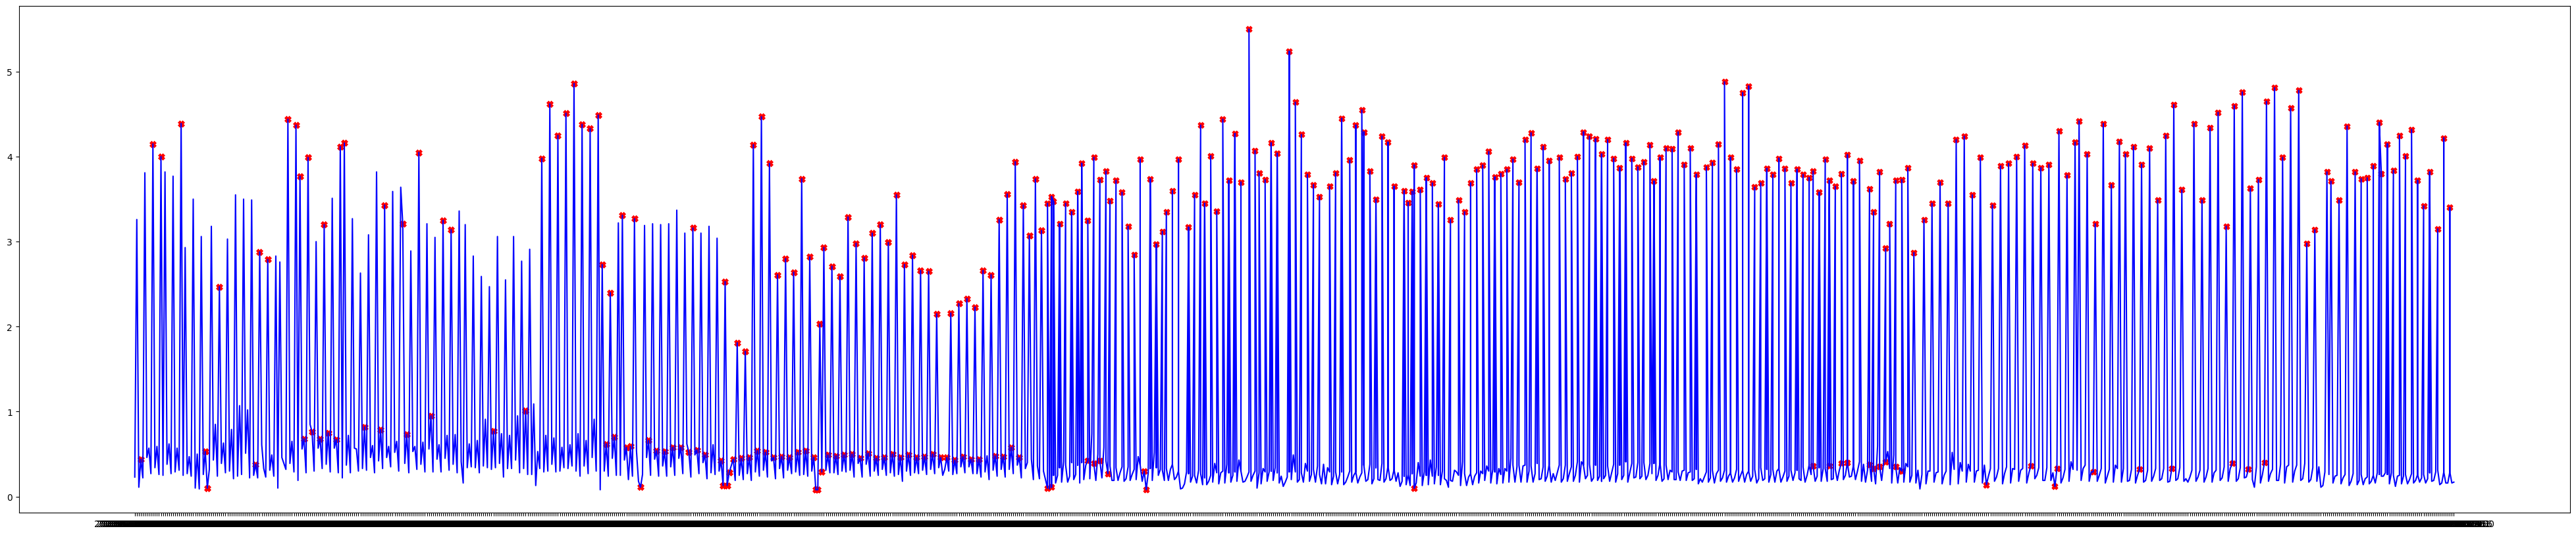

In [ ]:
fig, ax = plt.subplots(figsize=(50,10))
X_test['anomaly_svm'] = pd.Series(ocs.predict(X_test[['XOAVelocity', 'YOAVelocity', 'ZOAVelocity']])).values
anomaly = X_test.loc[X_test['anomaly_svm'] == -1, ['converted', 'XOAVelocity']] #anomaly



ax.plot(X_test['converted'][], X_test['XOAVelocity'], color='blue')
ax.scatter(anomaly['converted'],anomaly['XOAVelocity'],  marker='X',color='red')

plt.show();

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_pred, pos_label=-1) # how many of the predicted anomalies are actually faults
recall = recall_score(y_test, y_pred, pos_label=-1) # how many of the actual faults were correctly identified as anomalies
f1score = f1_score(y_test, y_pred, pos_label=-1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.87      0.82      0.84      1418
           1       0.92      0.94      0.93      3029

    accuracy                           0.90      4447
   macro avg       0.89      0.88      0.89      4447
weighted avg       0.90      0.90      0.90      4447

